Cleaning and Analysing scrapped data of 'https://www.immoweb.be/en'
* import pandas, urllib, seaborn and matplotlib
* reading csv file (scraped_data_10.csv) as dataframe (df)

In [165]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import urllib
df = pd.read_csv('scraped_data_10.csv')

Removing duplicates

In [166]:
duplicates = df[df.duplicated()]
df = df.drop_duplicates()

Cleaning 'Energy class' and 'Primary energy consumption' data
* replacing 'Not specified' to 'NS' in primary energy consumption.
* replacing 'Not specified' to '0' in energy class
* converting primary energy consumption to numeric data

In [177]:
df['Energy class']=df['Energy class'].replace('Not specified', 'NS')
df['Primary energy consumption']=df['Primary energy consumption'].replace('Not specified', int(0))
df['Primary energy consumption']=pd.to_numeric(df['Primary energy consumption'])


Cleaning 'Terrace' data
* replacing 'Yes' to '1' 
* converting terrace to numeric data

In [ ]:
df['Terrace']=df['Terrace'].replace('Yes',int(1))
df['Terrace']=pd.to_numeric(df['Terrace'])

Cleaning 'Furnished' data
* replacing 'Yes' to '1'
* replacing 'No' to '0'
* converting furnished to numeric data

In [ ]:
df['Furnished']=df['Furnished'].replace('Yes',int(1))
df['Furnished']=df['Furnished'].replace('No',int(0))
df['Furnished']=pd.to_numeric(df['Furnished'])

Cleaning 'FurnOfficeished' data
* replacing 'Yes' to '1'
* replacing 'No' to '0'
* converting Office to numeric data

In [ ]:
df['Office']=df['Office'].replace('Yes',int(1))
df['Office']=df['Office'].replace('No',int(0))
df['Office']=pd.to_numeric(df['Office'])

Cleaning 'Location' data by removing symbols

In [179]:
df['Location'] = df['Location'].apply(lambda x: urllib.parse.unquote(x))

* Merging 'provinces' to colums from 'provinces.csv' 
* Creating merged data as 'merged_10k1.csv' 

In [180]:
pro = pd.read_csv('provinces.csv')
pro['postal code'] = pro['postal code'].astype(str)
merged_df = df.merge(pro[['postal code', 'province']], on='postal code', how='left')
merged_df.to_csv('merged_10k1.csv', index=False)

In [181]:
merged_10 = pd.read_csv('merged_10k1.csv')

Cleaning 'Price'
* replacing euro symbol , dot as empty
* removing rows that contains zero price
* removing empty rows
* converting price to numeric data

converting cleaned dataframe to 'final.csv' as final

In [182]:
merged_10['Price']=merged_10['Price'].str.replace('€', '')
merged_10['Price']=merged_10['Price'].str.replace('.', '')
merged_10 = merged_10.drop(merged_10[merged_10['Price'] == str(0)].index)
merged_10['Price'] = pd.to_numeric(merged_10['Price'], errors='coerce')
merged_10 = merged_10.dropna(subset=['Price'])
    
merged_10.to_csv('final.csv',index=False)

In [185]:
final = pd.read_csv('final.csv')


<Axes: xlabel='Energy class', ylabel='Price'>

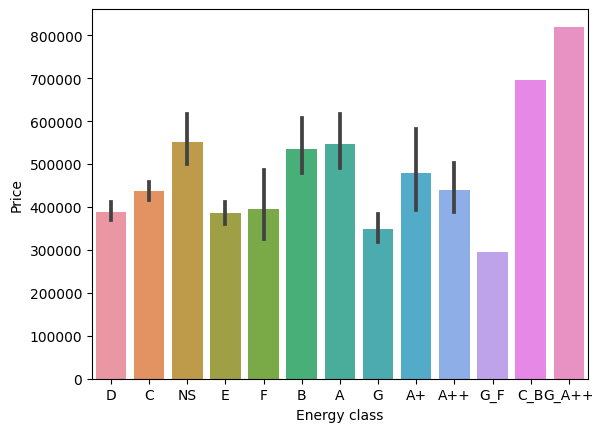

In [191]:
#sns.FacetGrid(final, )

sns.barplot(x='Energy class', y='Price', data=final)